# Testing performance of different shrinkage techniques
This corresponds to the performance experiments in section 4 of Agarwal et al. 2022.

In [1]:
from imodels.util.data_util import get_clean_dataset
import numpy as np
from aughs import ShrinkageClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

## Classification

In [2]:
clf_datasets = [
    ("heart", "heart", "imodels"),
    ("breast-cancer", "breast_cancer", "imodels"), 
    ("haberman", "haberman", "imodels"), 
    ("ionosphere", "ionosphere", "pmlb"),
    ("diabetes-clf", "diabetes", "pmlb"),
    ("german", "german", "pmlb"),
    ("juvenile", "juvenile_clean", "imodels"),
    ("recidivism", "compas_two_year_clean", "imodels")
]

<>:15: DeprecationWarning: invalid escape sequence '\l'
<>:15: DeprecationWarning: invalid escape sequence '\l'
/tmp/ipykernel_52794/1488901920.py:15: DeprecationWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$")


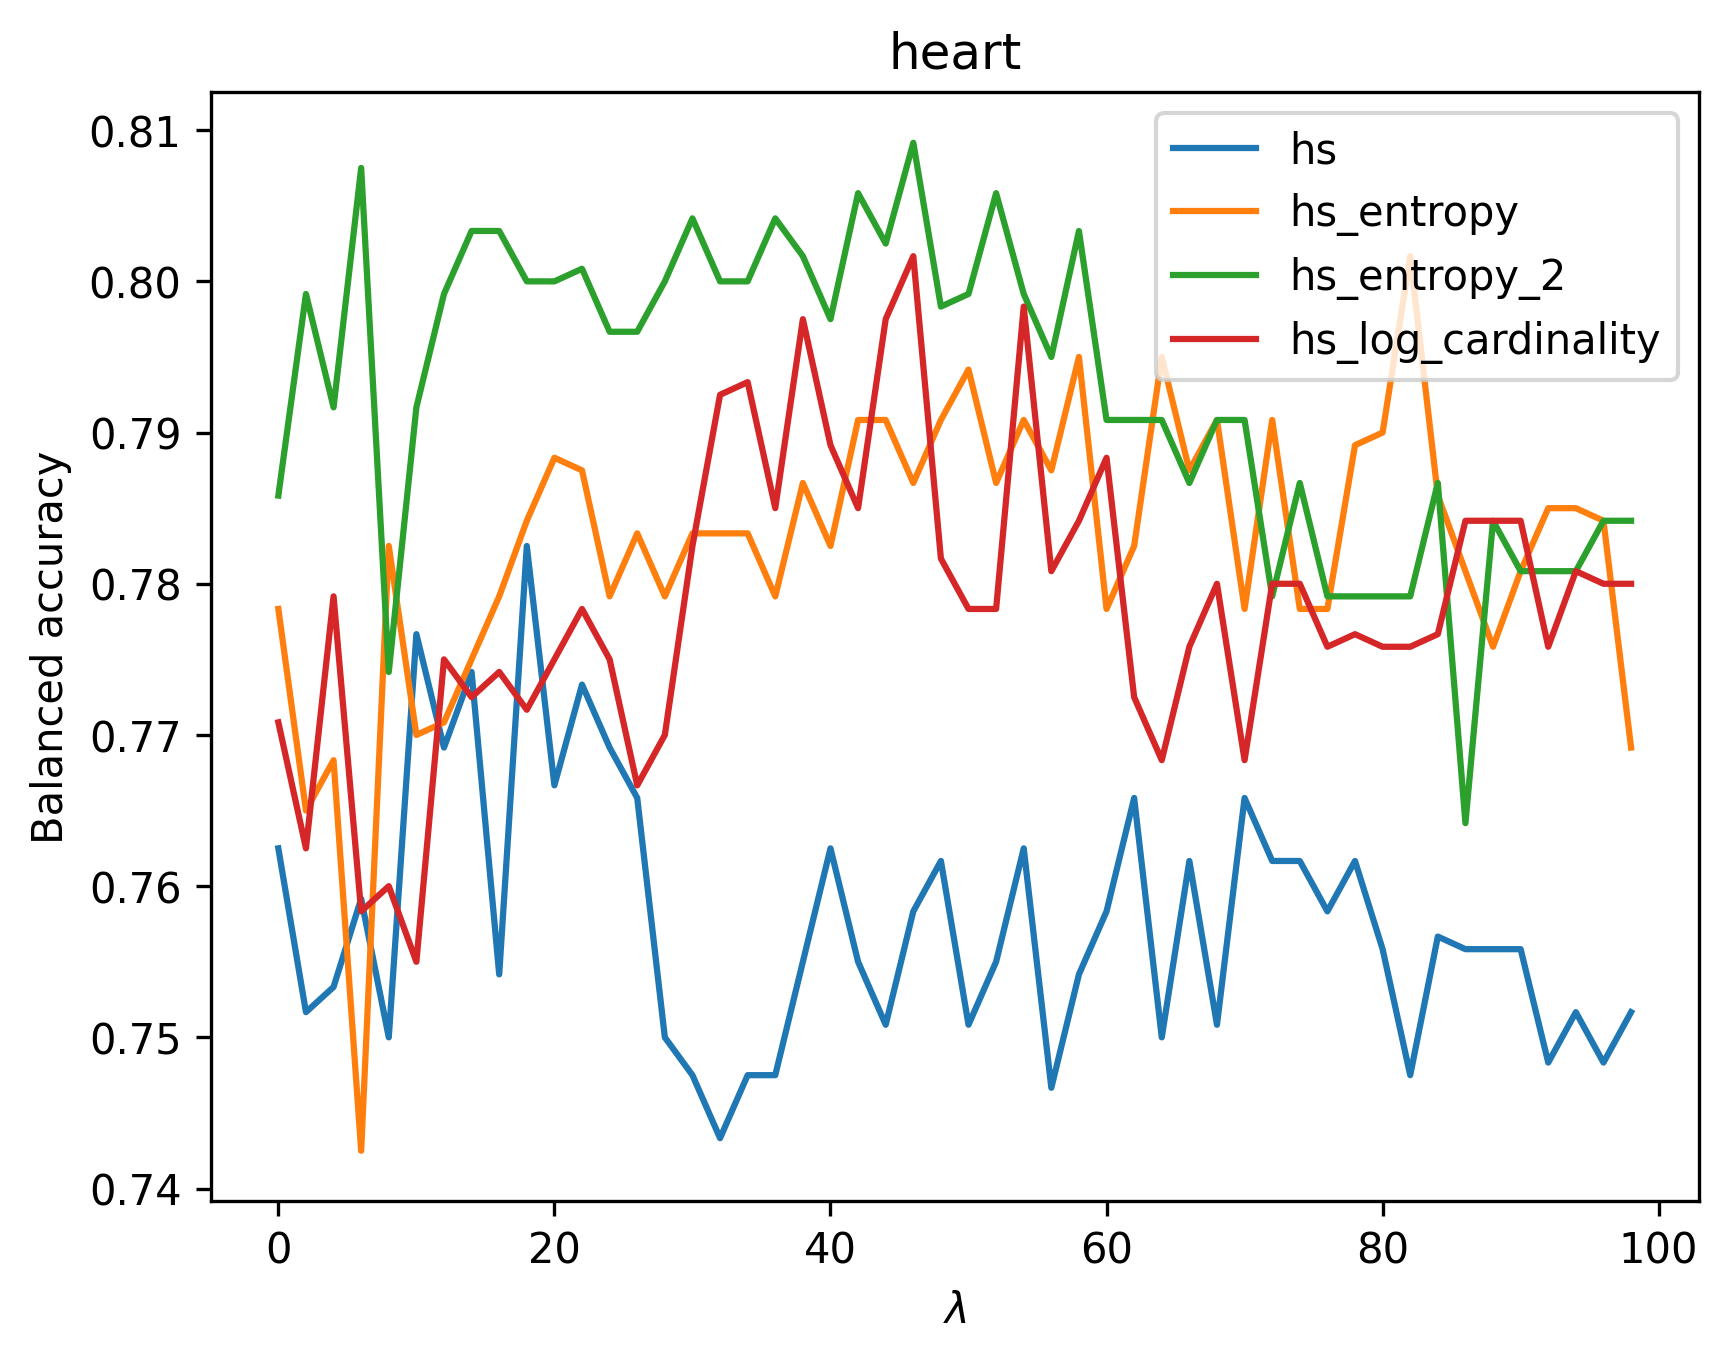

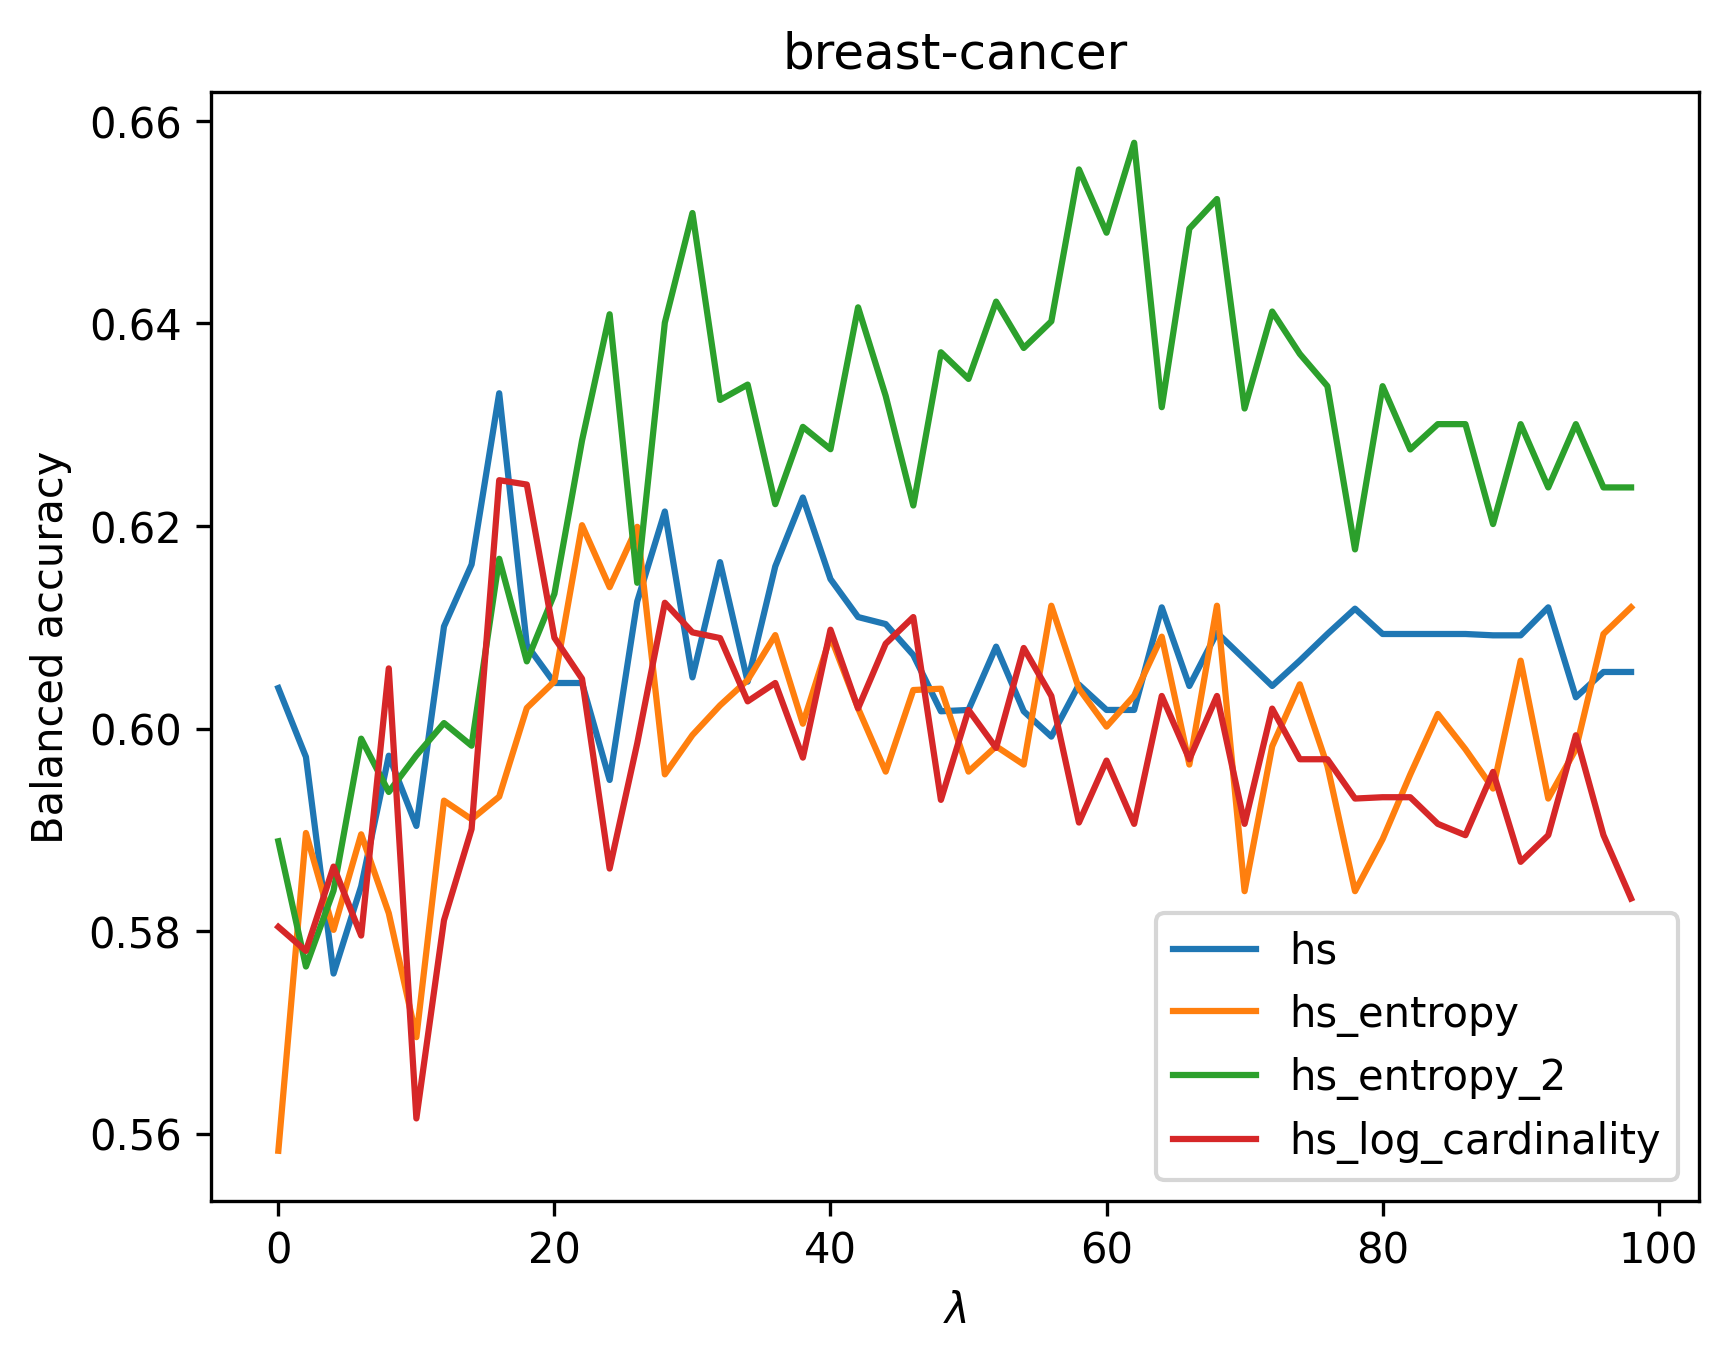

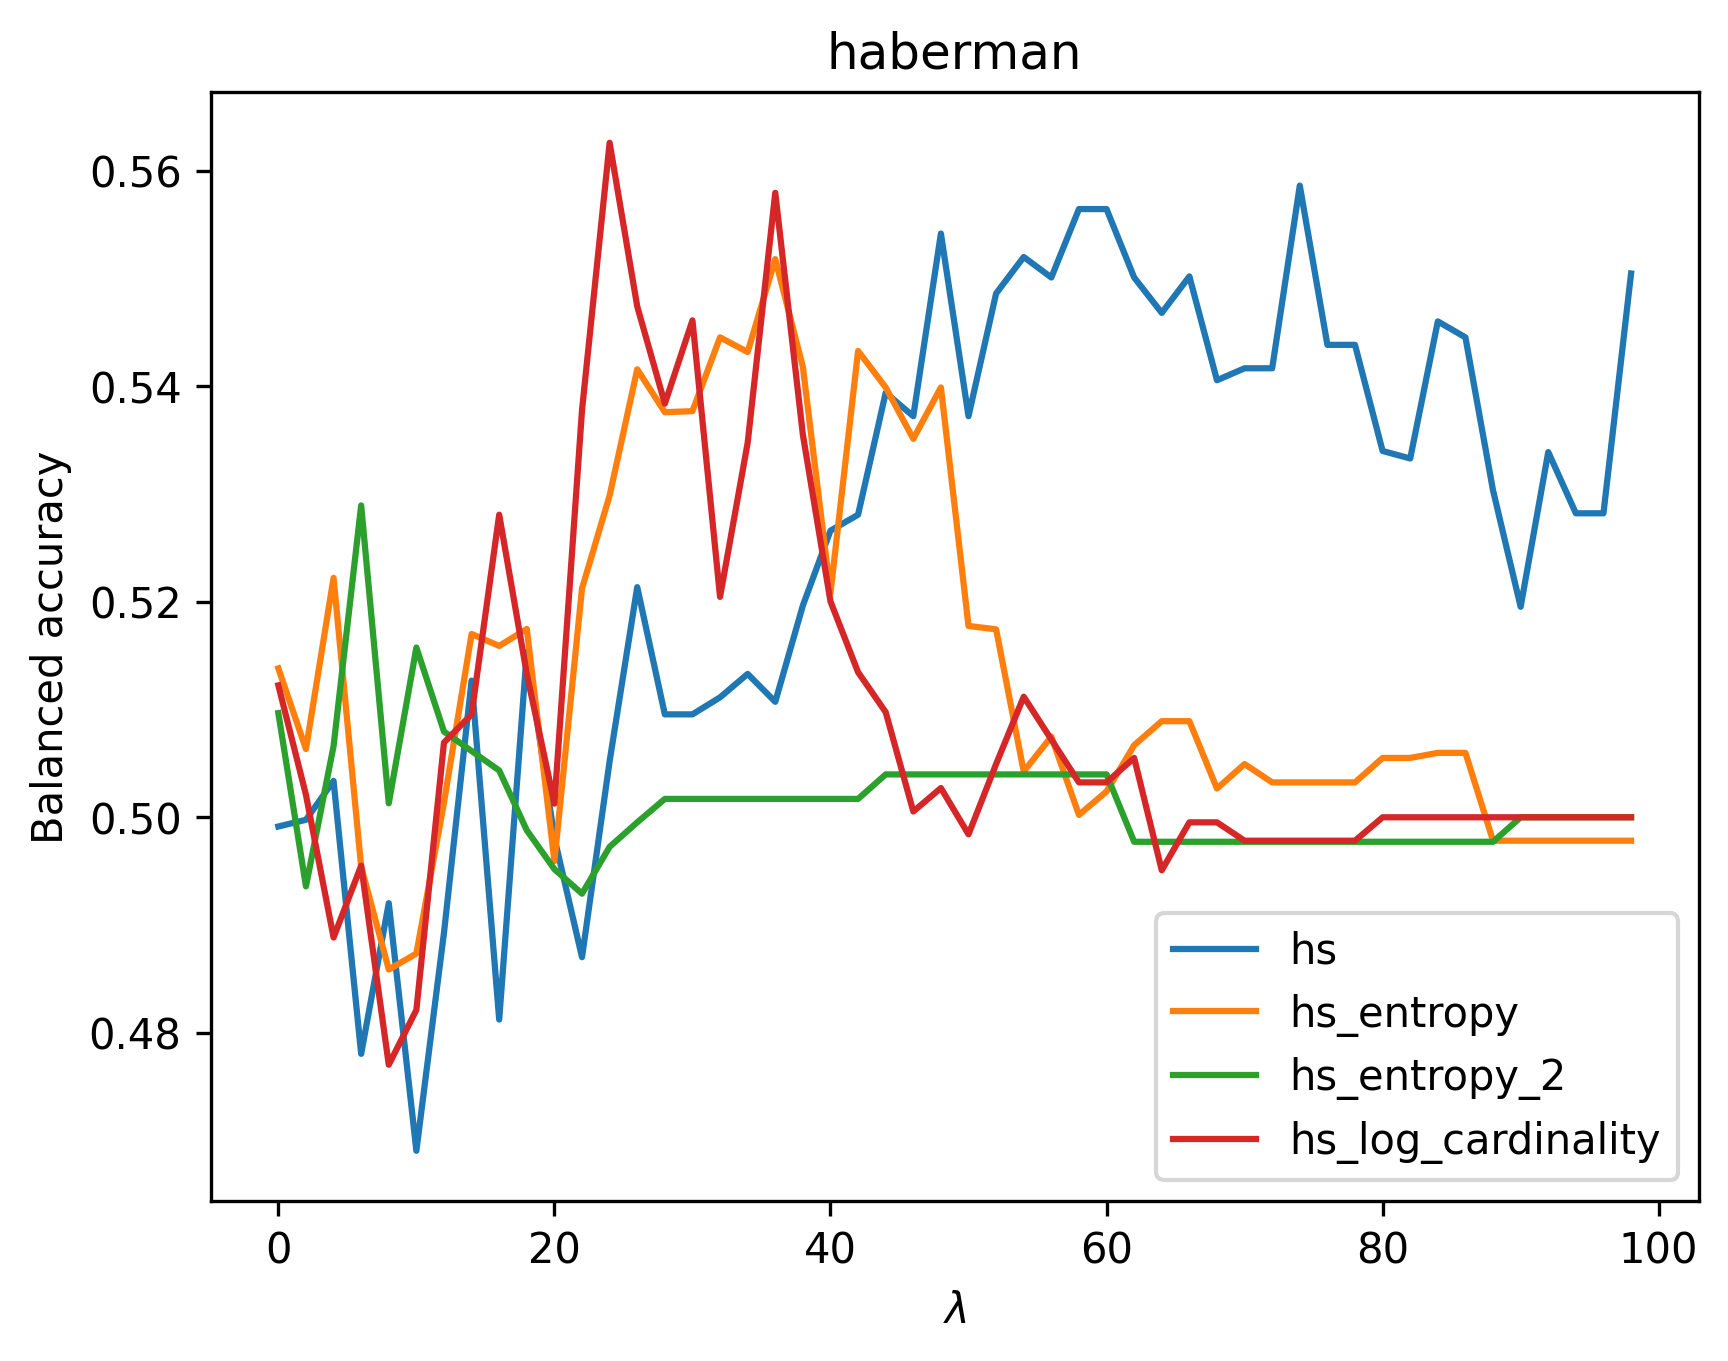

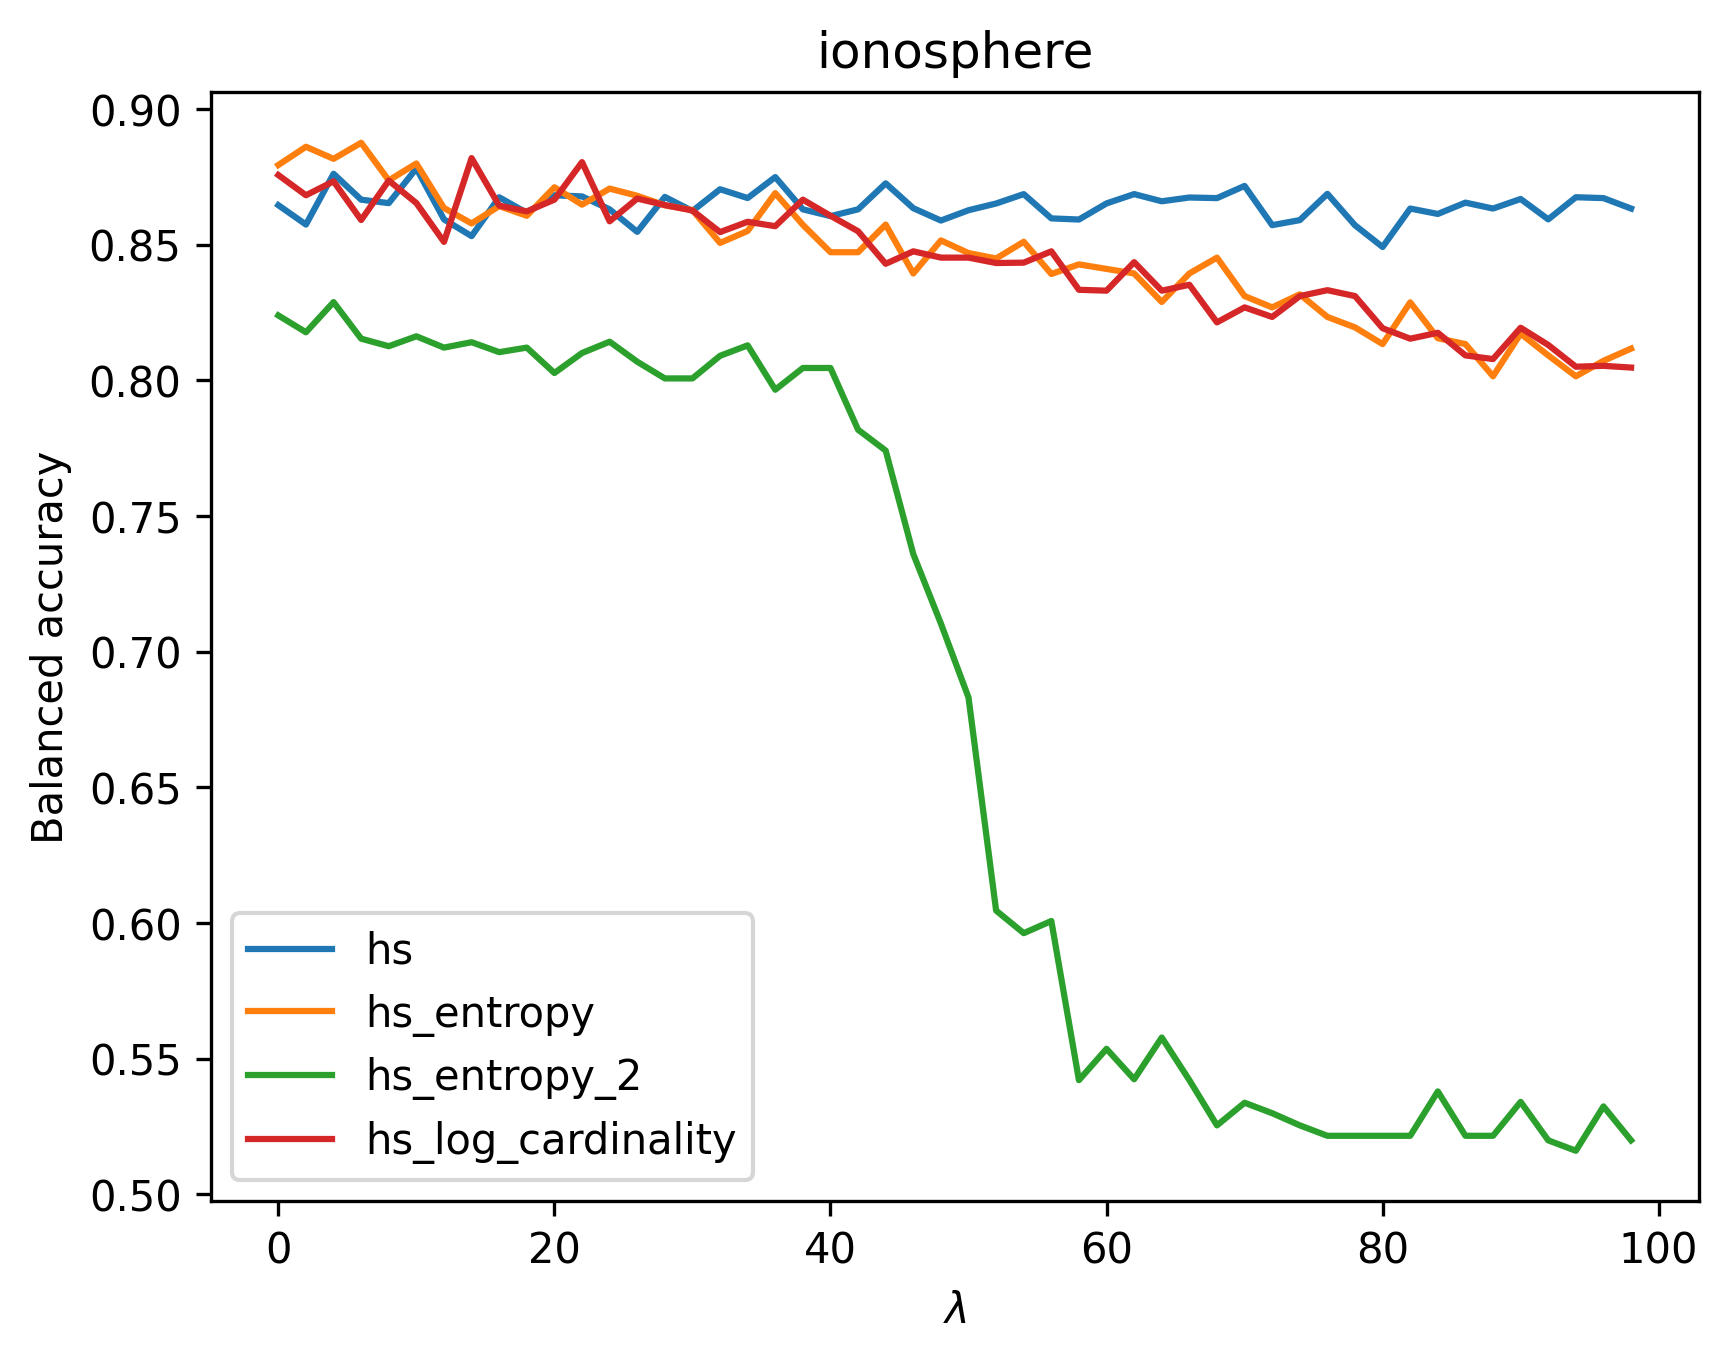

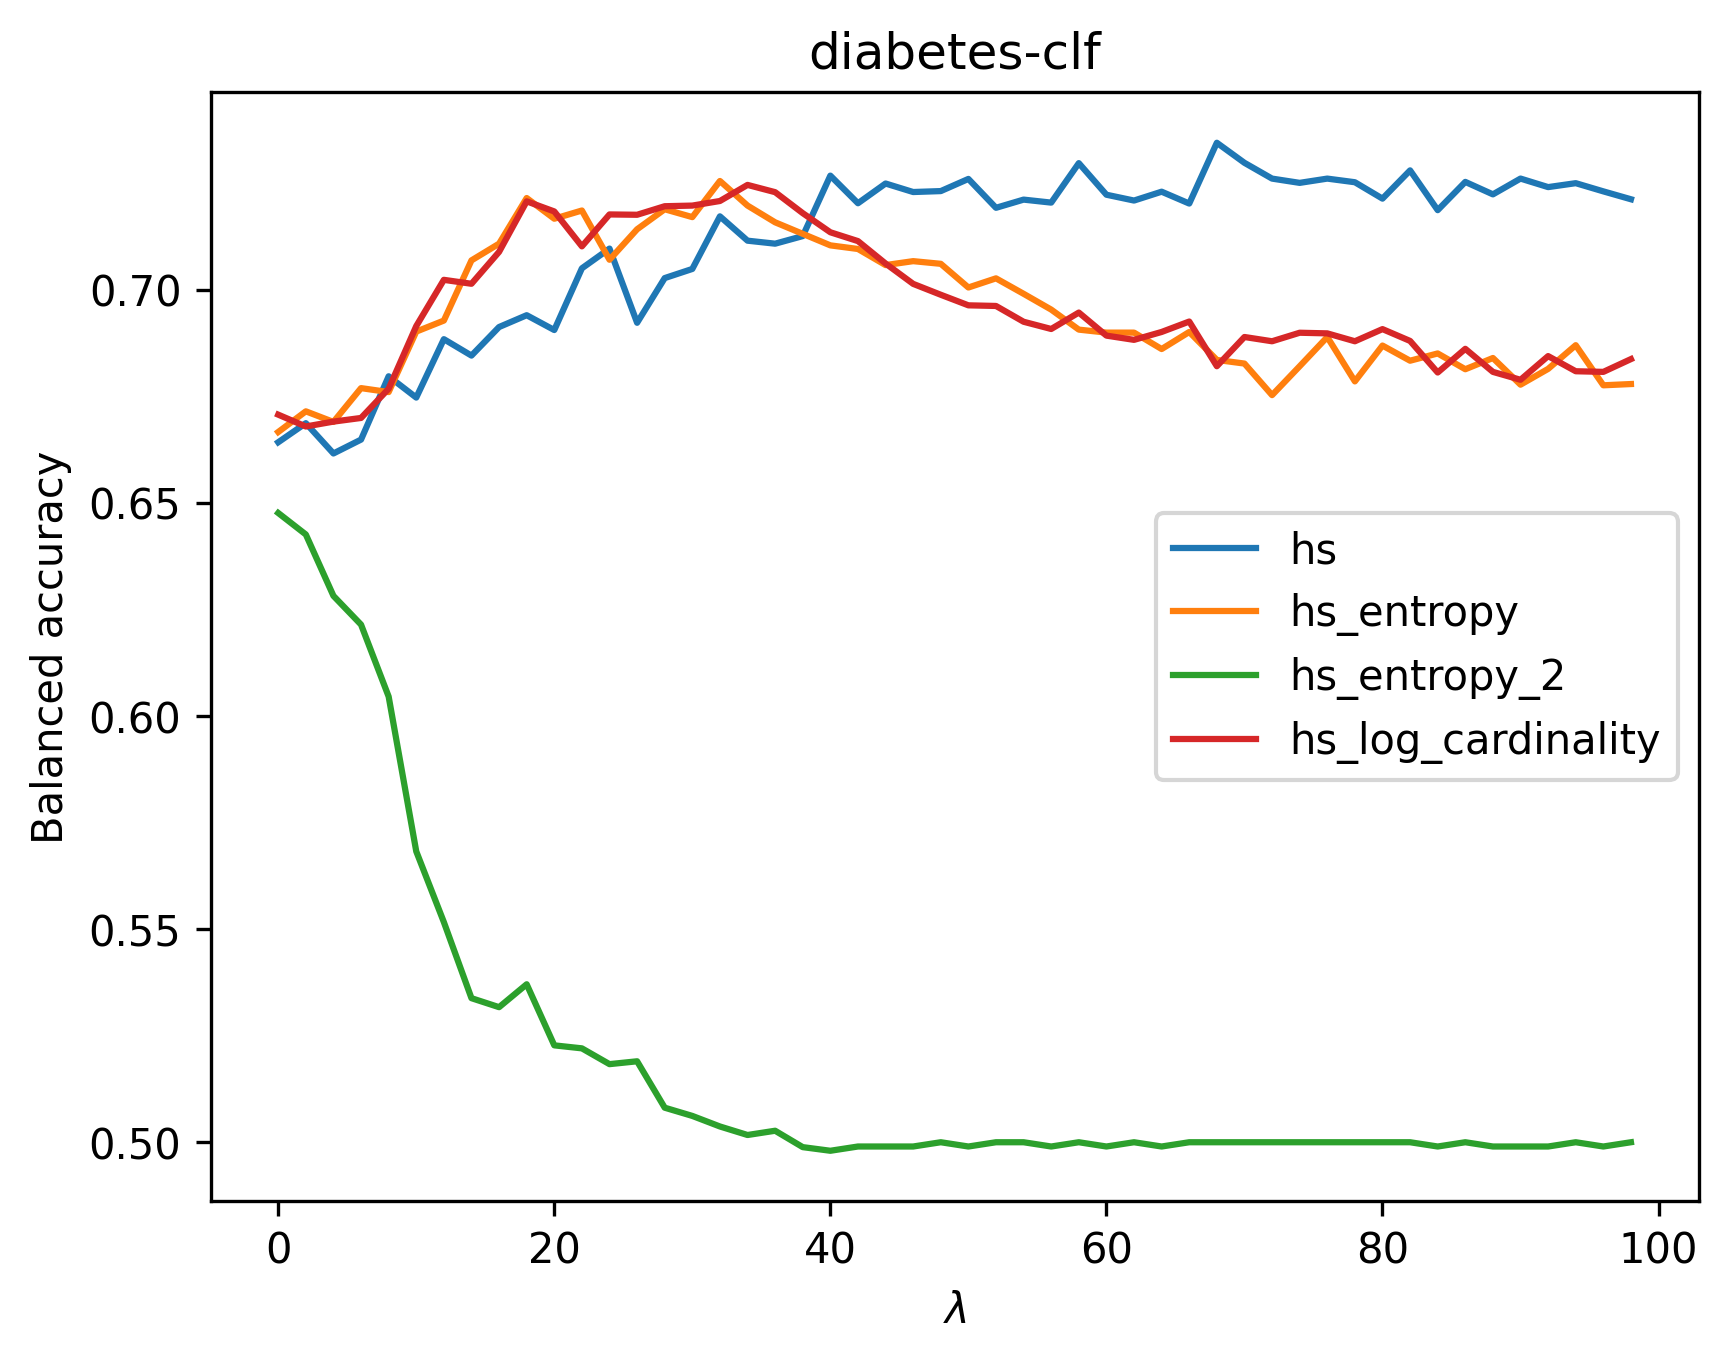

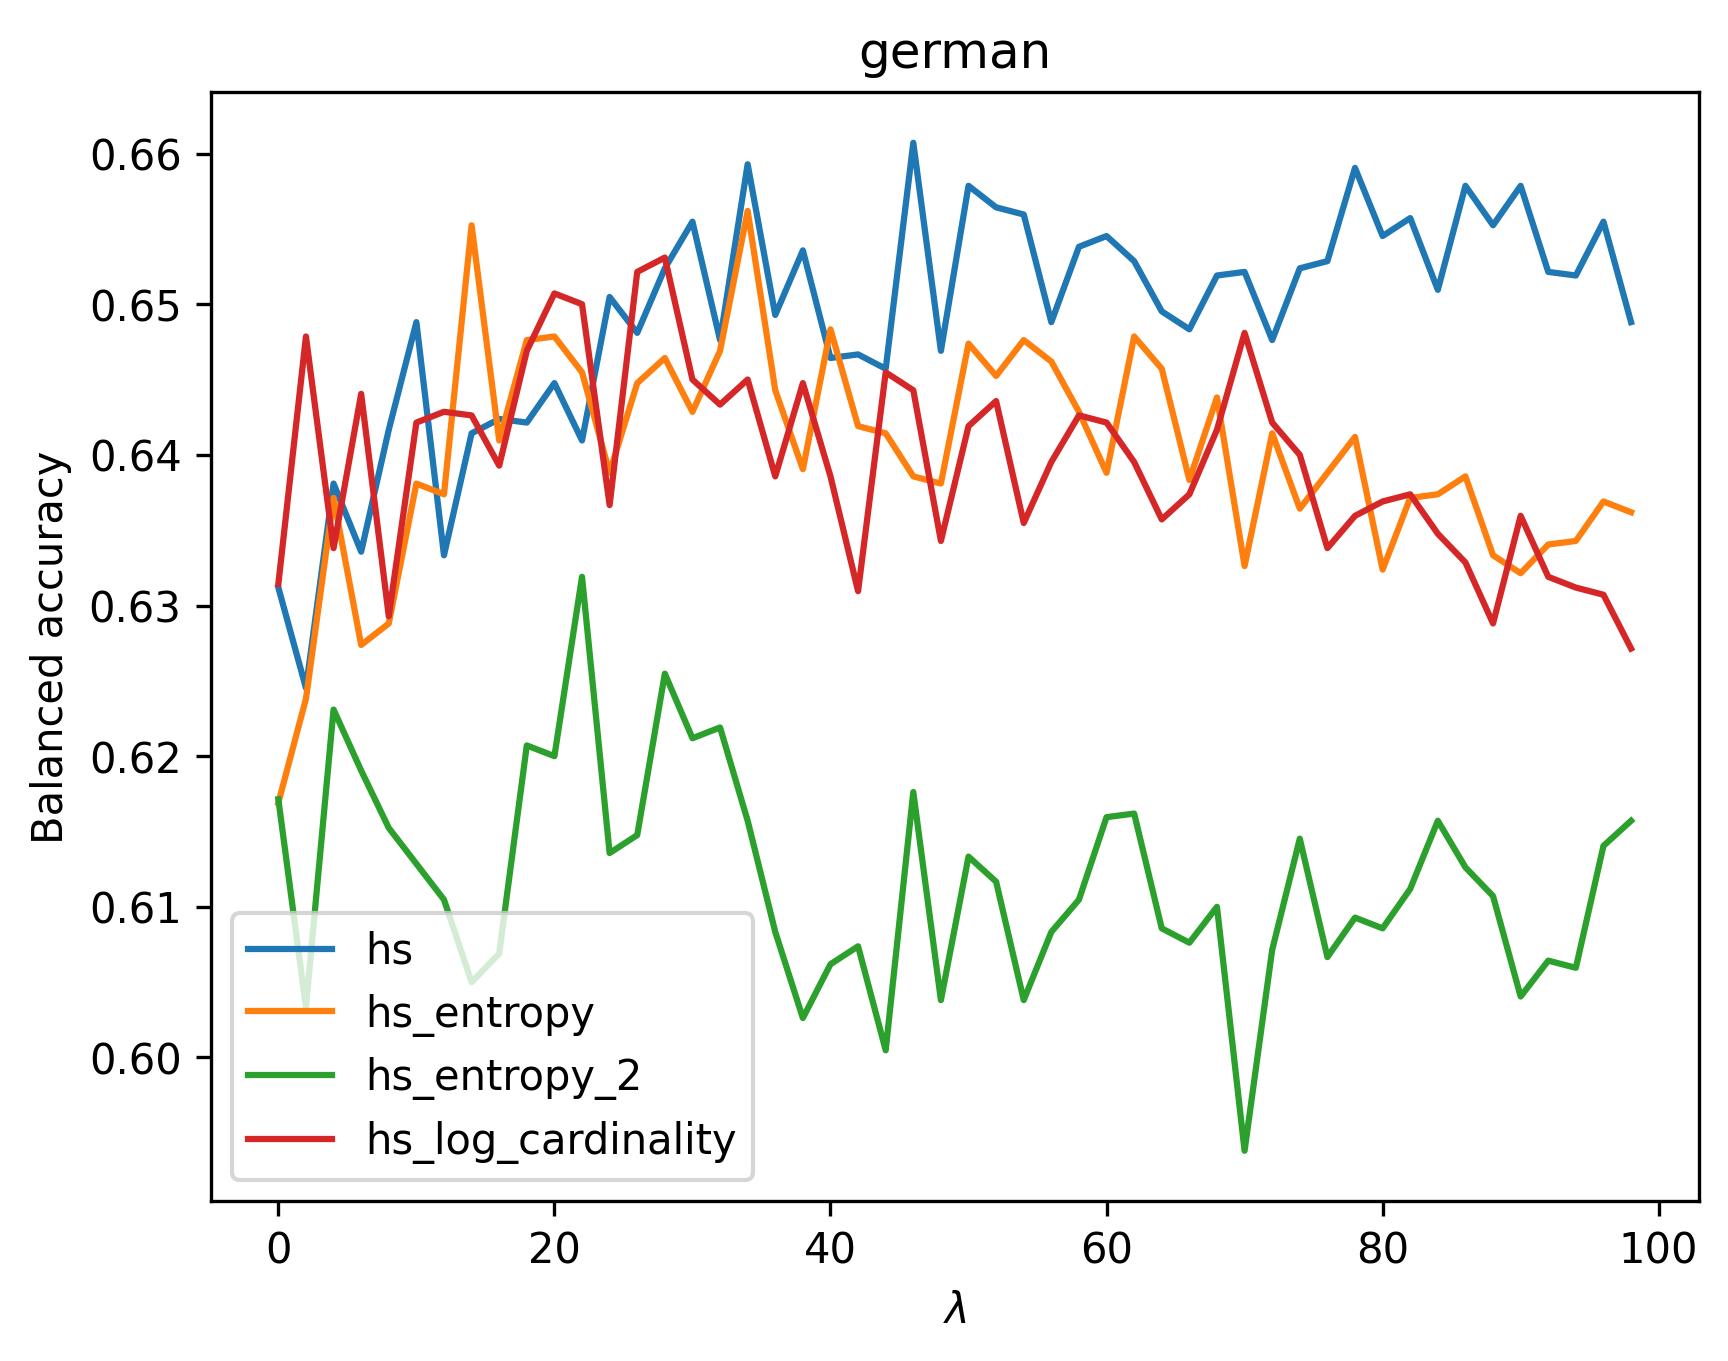

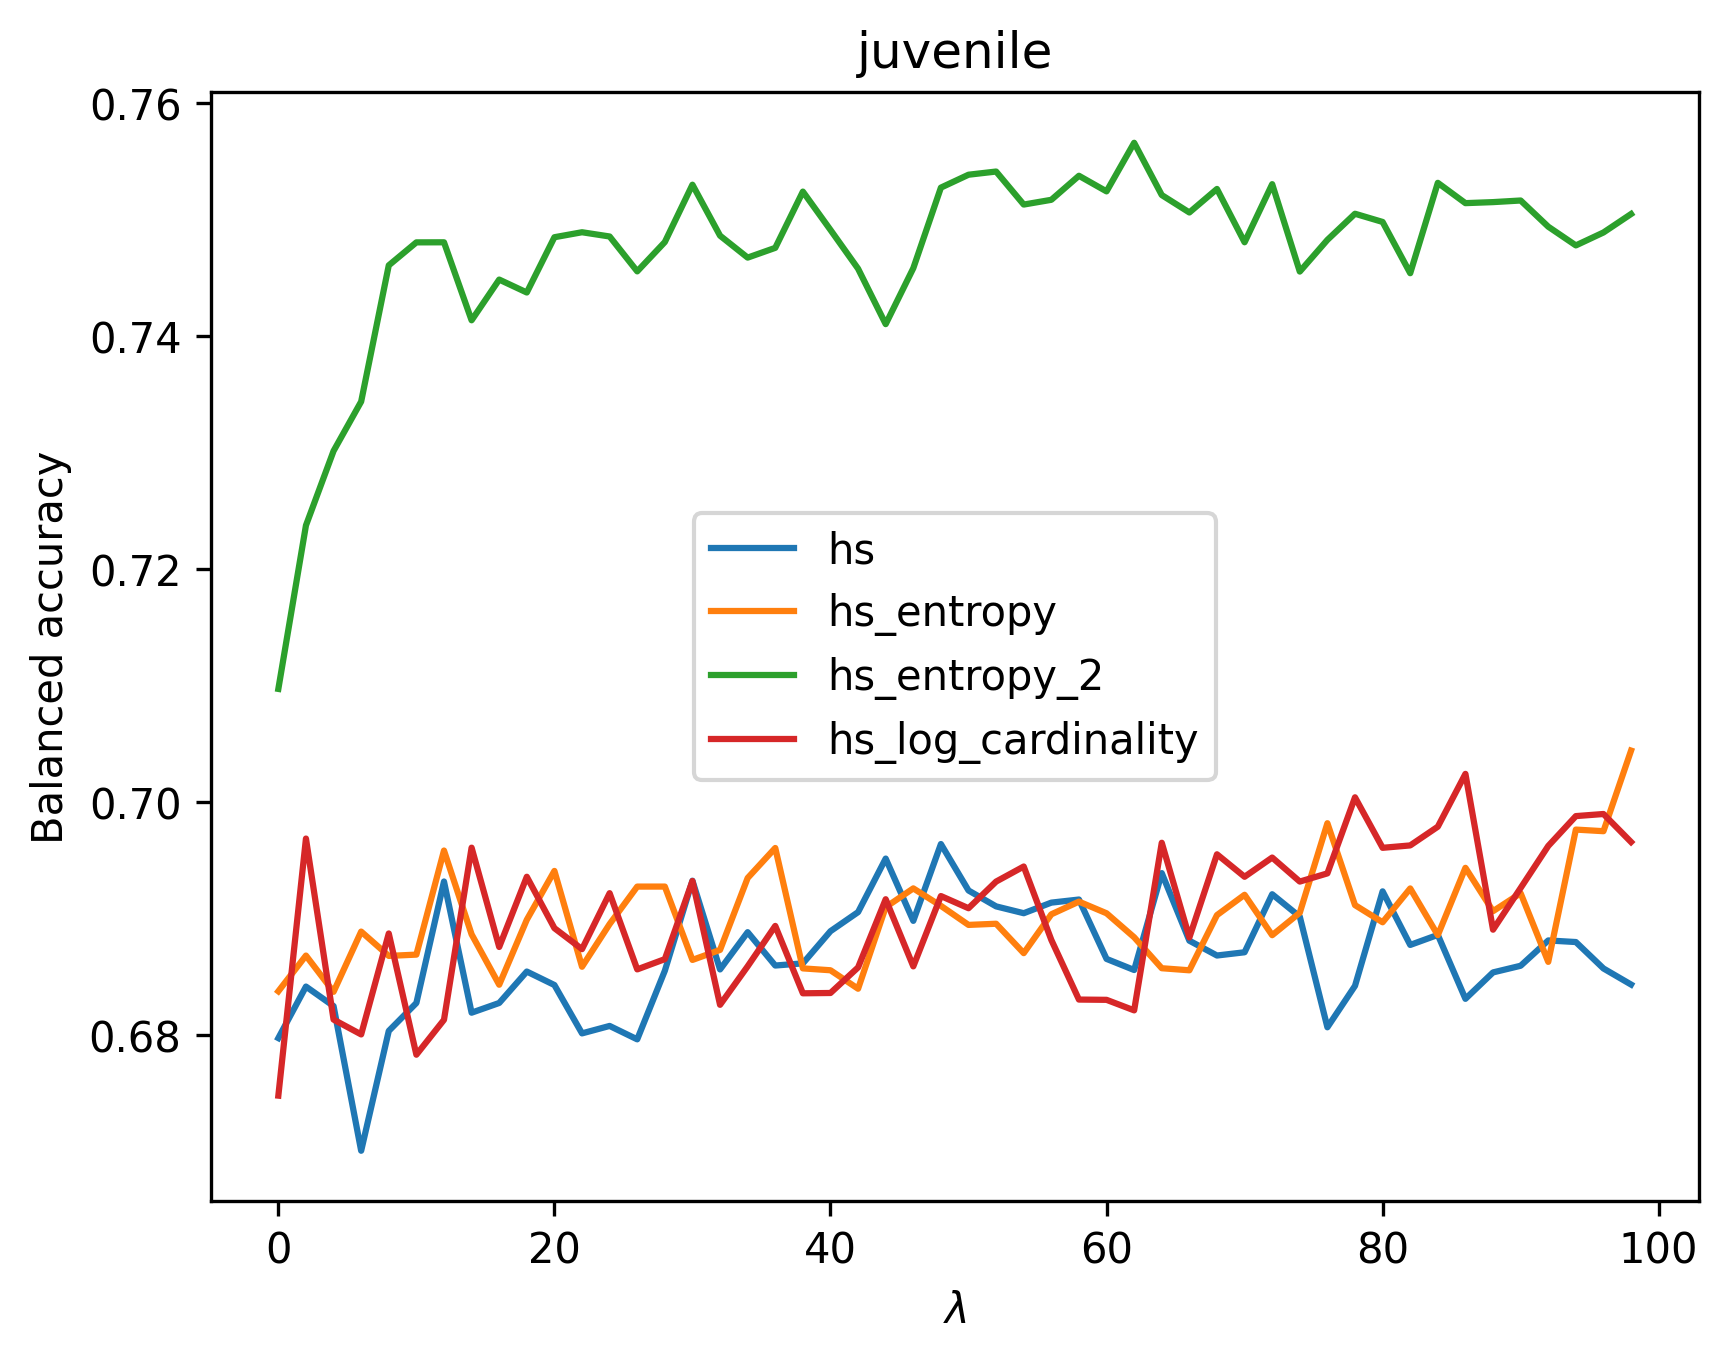

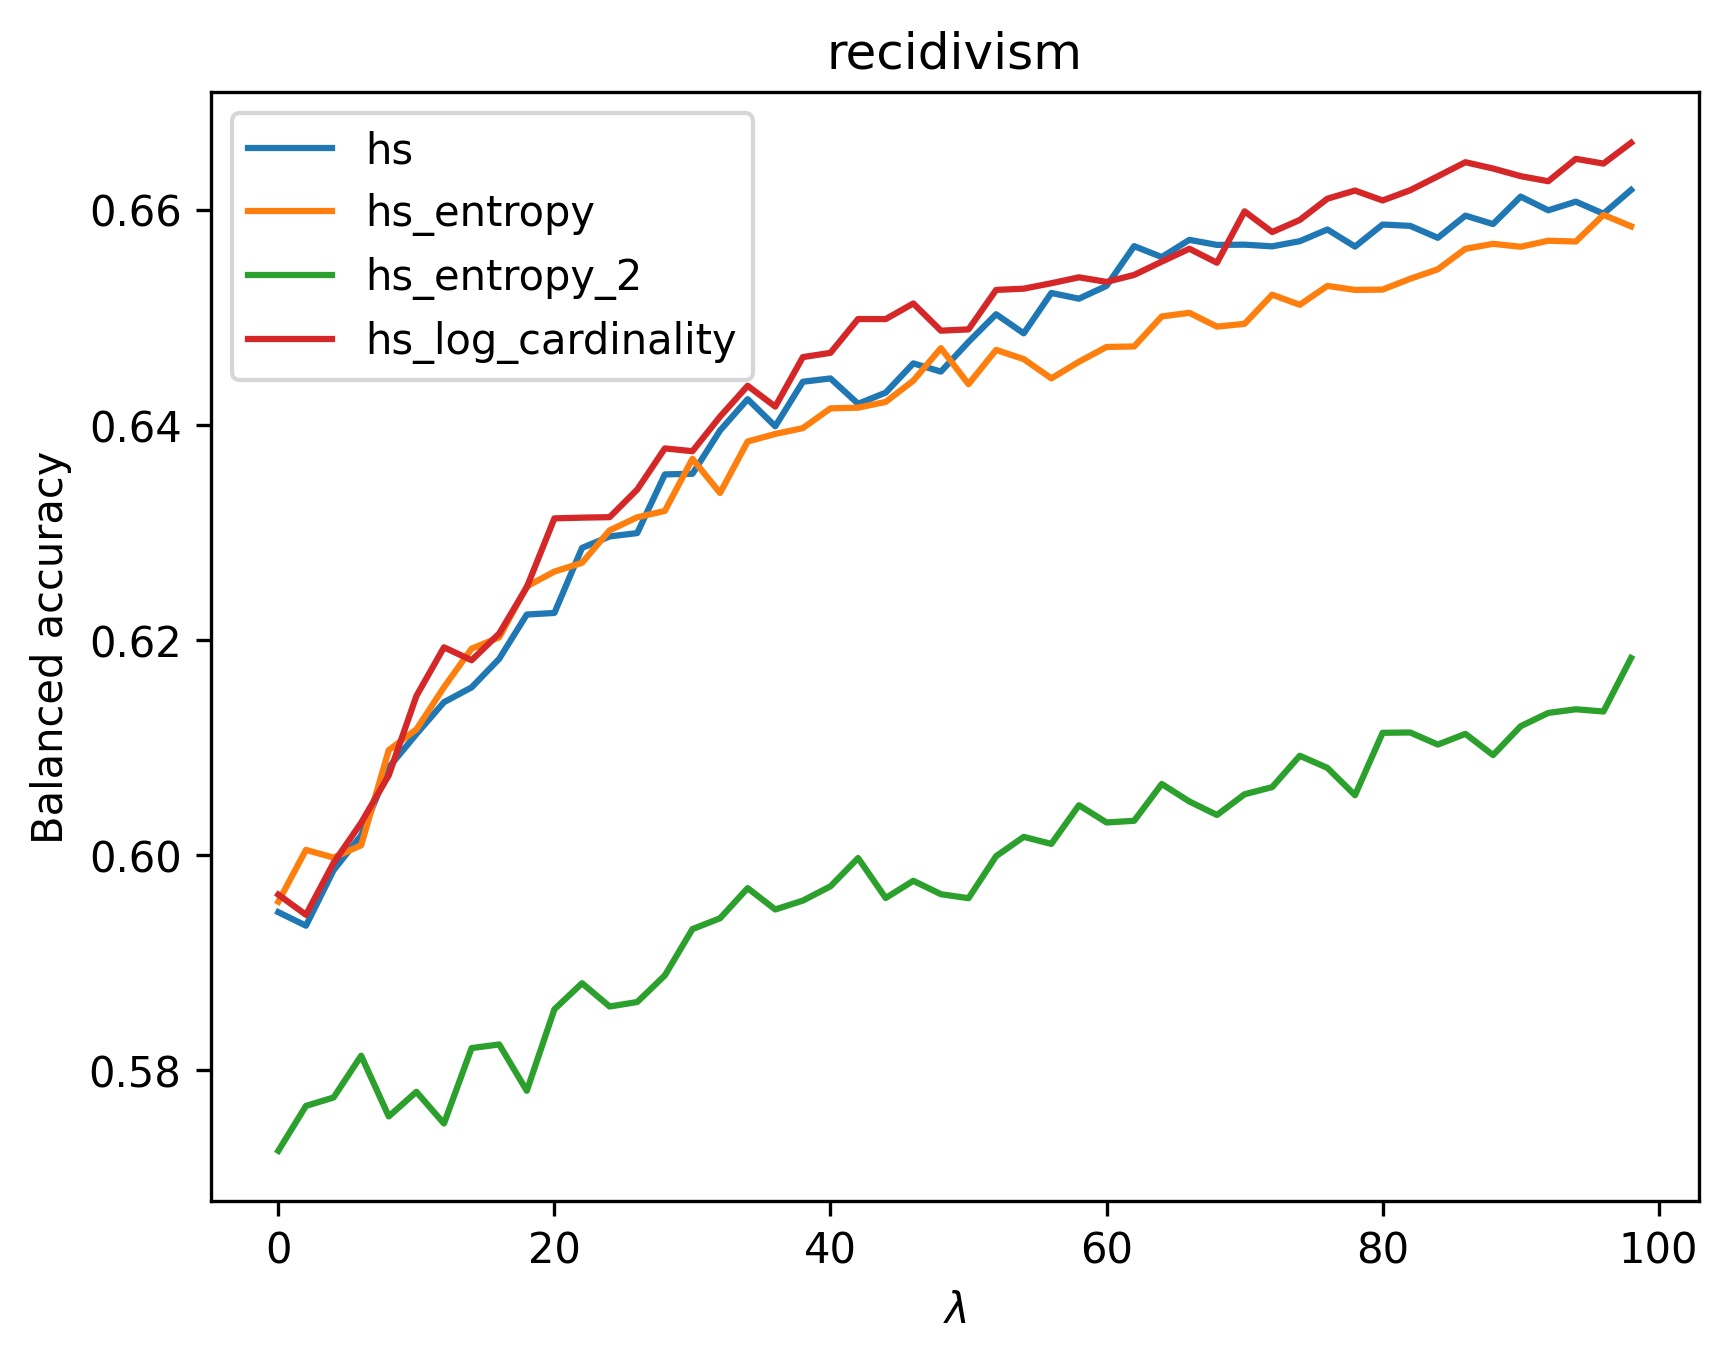

In [3]:
lmbs = np.arange(0, 100, 2)
for ds_name, id, source in clf_datasets:
    X, y, feature_names = get_clean_dataset(id, data_source=source)
    scores = {}
    for shrink_mode in ["hs", "hs_entropy", "hs_entropy_2", "hs_log_cardinality"]:
        scores[shrink_mode] = []
        for lmb in lmbs:
            clf = ShrinkageClassifier(shrink_mode=shrink_mode, lmb=lmb)
            scores[shrink_mode].append(
                cross_val_score(clf, X, y, cv=10, n_jobs=-1,
                                scoring="balanced_accuracy").mean())
    for key in scores:
        plt.plot(lmbs, scores[key], label=key)
    plt.legend()
    plt.xlabel("$\lambda$")
    plt.ylabel("Balanced accuracy")
    plt.title(ds_name)
    plt.show()


## Regression

In [4]:
reg_datasets = [
    ("friedman1", "friedman1", "synthetic"),
    ("friedman3", "friedman3", "synthetic"),
    ("diabetes-reg", "diabetes", "sklearn"),
    ("abalone", "183", "openml"),
    ("satellite-image", "294_satellite_image", "pmlb"),
    ("california-housing", "california_housing", "sklearn")
]

In [5]:
for ds_name, id, source in reg_datasets:
    print(ds_name)
    X, y, feature_names = get_clean_dataset(id, data_source=source)
    print(X.shape, y.shape)

friedman1
(200, 10) (200,)
friedman3
(200, 4) (200,)
diabetes-reg
(442, 10) (442,)
abalone


/home/arne/miniconda3/envs/hierarchical-shrinkage/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(4177, 8) (4177,)
satellite-image
(6435, 36) (6435,)
california-housing
(20640, 8) (20640,)
